In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
572,0,3,Mr. George Patchett,male,19.0,0,0,14.5000
573,1,2,Miss. Ethel Garside,female,34.0,0,0,13.0000
574,1,1,Mrs. William Baird (Alice Munger) Silvey,female,39.0,1,0,55.9000
575,0,3,Mrs. Joseph (Maria Elias) Caram,female,18.0,1,0,14.4583


In [18]:
X_train1 = train.drop(['Survived', 'Name'], axis =1)
X_train1.replace('male', 0 , inplace = True)
X_train1.replace('female', 1 , inplace = True)
X_train1

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
572,3,0,19.0,0,0,14.5000
573,2,1,34.0,0,0,13.0000
574,1,1,39.0,1,0,55.9000
575,3,1,18.0,1,0,14.4583


In [19]:
y_train = train['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
572    0
573    1
574    1
575    0
576    1
Name: Survived, Length: 577, dtype: int64

In [20]:
def Z_normalise(X_train):
    mu = X_train.mean(axis = 0)
    std = np.std(X_train)
    X_train = ((X_train - mu)/std)
    return X_train

In [21]:
X_train1['Age']= Z_normalise(X_train1['Age'])
X_train1['Fare']= Z_normalise(X_train1['Fare'])
X_train1 = X_train1
X_train1
m = len(X_train1)
X_train1

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,0,-0.516771,1,0,-0.527889
1,1,1,0.610286,1,0,0.841059
2,3,1,-0.235007,0,0,-0.513458
3,1,1,0.398962,1,0,0.452324
4,3,0,0.398962,0,0,-0.510786
...,...,...,...,...,...,...
572,3,0,-0.728094,0,0,-0.372894
573,2,1,0.328521,0,0,-0.404962
574,1,1,0.680727,1,0,0.512184
575,3,1,-0.798535,1,0,-0.373785


In [22]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [23]:
def compute_cost(X, y, w,b):
    cost = 0.0
    m = X.shape[0]
    for i in range(m):
        z_i = np.dot(X[i], w)+b
        f_z_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_z_i) - (1-y[i]) * np.log(1 - f_z_i)
    cost /= m
    return cost

In [24]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape
    dj_dw = np.zeros(n)                     
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                      
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    return dj_db, dj_dw  

In [25]:
def gradient_descent(X, y, w_in, b_in, alpha, iters): 
    J_history = []
    b = b_in
    w = w_in
    for i in range(iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b)   
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db                 
        J_history.append( compute_cost(X, y, w, b) )
    return w, b, J_history        


In [26]:
X_train = X_train1.to_numpy()
m,n= X_train.shape
w_tmp  = np.zeros(n)
b_tmp  = 0.0
alph = 0.0002
iters = 20000
print(w_tmp)
w, b, J_hist = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w}, b:{b}")
m,_ = X_train.shape
for i in range(m):
    print("prediction: 1" if (np.dot(X_train[i], w) + b) > 0.5 else "prediction: 0", end = "")
    print(f", target value: {y_train[i]}")

[0. 0. 0. 0. 0. 0.]

updated parameters: w:[-0.27515563  0.45447006 -0.14004796 -0.09731942  0.07304451  0.1752622 ], b:-0.0011173695668120567
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 1, targe

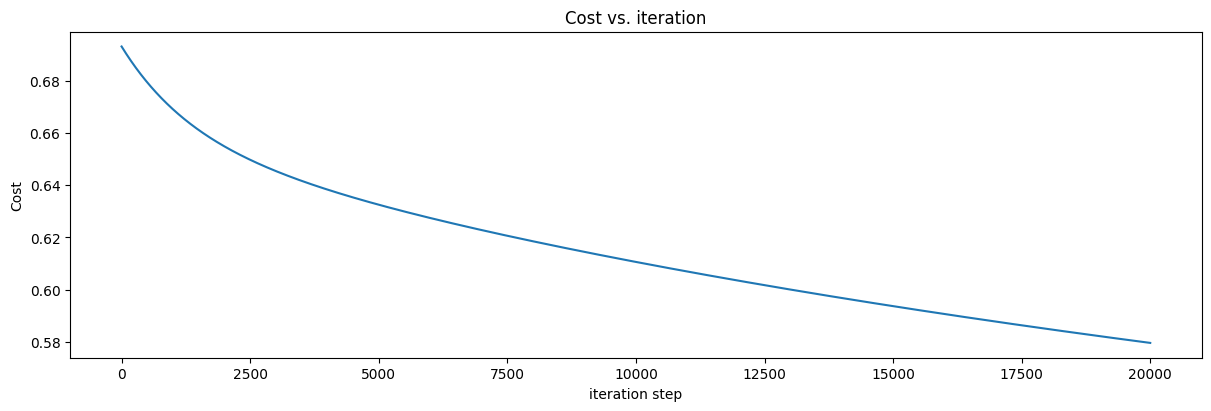

In [27]:
fig, (ax1) = plt.subplots(1, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')              
ax1.set_xlabel('iteration step')   
plt.show()

In [28]:
test = pd.read_csv('test.csv')
X_test1 = test.drop(['Survived', 'Name'] ,  axis =1)
X_test1.replace('male', 0 , inplace = True)
X_test1.replace('female', 1 , inplace = True)
X_test1

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,2,1,25.0,1,1,30.0000
1,1,1,39.0,1,1,110.8833
2,2,0,54.0,0,0,26.0000
3,1,0,36.0,0,0,40.1250
4,3,0,16.0,0,0,8.7125
...,...,...,...,...,...,...
305,2,0,27.0,0,0,13.0000
306,1,1,19.0,0,0,30.0000
307,3,1,7.0,1,2,23.4500
308,1,0,26.0,0,0,30.0000


In [29]:
X_test1['Age']= Z_normalise(X_test1['Age'])
X_test1['Fare']= Z_normalise(X_test1['Fare'])
X_test1 = X_test1
X_test1

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,2,1,-0.338431,1,1,-0.054341
1,1,1,0.664726,1,1,1.419953
2,2,0,1.739537,0,0,-0.127251
3,1,0,0.449763,0,0,0.130212
4,3,0,-0.983318,0,0,-0.442357
...,...,...,...,...,...,...
305,2,0,-0.195123,0,0,-0.364207
306,1,1,-0.768356,0,0,-0.054341
307,3,1,-1.628205,1,2,-0.173731
308,1,0,-0.266777,0,0,-0.054341


In [30]:
X_test = X_test1.to_numpy()

In [33]:
y_test = test['Survived']
m,_ = X_test.shape
for i in range(m):
    print("prediction: 1" if (np.dot(X_train[i], w) + round(b, 2)) > 0.5 else "prediction: 0", end = "")
    print(f", target value: {y_train[i]}")

prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 1, target value: 0
prediction: 0, target value: 1
prediction: 0, target value: 0
prediction: 0, target value: 0
prediction: 0, target value: 1
predicti

In [35]:
from sklearn.metrics import accuracy_score
y_pred = []
for i in range(m):
    if (np.dot(X_train[i], w) + b) > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6258064516129033
